In [3]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


# Data Pre-processing

In [4]:
# load csv file 
heart_data = pd.read_csv(r"C:\Users\Srishti\Desktop\VIT VELLORE\SEMESTER-2\DM PROJECT\heart_data.csv")

In [5]:
#check data distribution
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   bp_hi        70000 non-null  int64
 6   bp_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [6]:
#print first 5 rows of the dataset
heart_data.head()

,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [7]:
#print last 5 rows of the dataset
heart_data.tail()

,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72,120,80,2,1,0,0,1,0


In [8]:
#check number of rows and column of dataset
heart_data.shape

(70000, 13)

In [9]:
#checking missing value

heart_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
bp_hi          0
bp_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
#statical measure of dataset
heart_data.describe()


,id,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205543,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395829,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#Drop the column which is not needed

heart_data = heart_data.dropna().drop('id',axis=1)
heart_data.head()

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0


# 1. Data Cleaning

In [12]:
#outlier Detection 

from numpy import percentile
data= heart_data['bp_hi']
# calculate interquartile range
q1, q3 = percentile(data, 0.28), percentile(data, 92)
iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off
print('UBQ :',upper)
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# non-outliers
non_outliers = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(non_outliers))

Percentiles: 25th=70.000, 75th=150.000, IQR=80.000
UBQ : 270.0
Identified outliers: 47
Non-outlier observations: 69953


In [13]:
heart_data=heart_data[(heart_data['bp_hi']<upper) & (heart_data['bp_hi']>lower)]
heart_data

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


In [14]:
# outlier detection

from numpy import percentile
data= heart_data['bp_lo']
# calculate interquartile range
q1, q3 = percentile(data, 0.07), percentile(data, 98.6)
iqr = q3 - q1
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q1, q3, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q1 - cut_off, q3 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# non-outliers
non_outliers = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(non_outliers))

Percentiles: 25th=30.000, 75th=150.000, IQR=120.000
Identified outliers: 953
Non-outlier observations: 69000


In [15]:
heart_data=heart_data[(heart_data['bp_lo']<upper) & (heart_data['bp_lo']>lower)]
heart_data

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
2,18857,1,165,64,130,70,3,1,0,0,0,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76,120,80,1,1,1,0,1,0
69996,22601,1,158,126,140,90,2,2,0,0,1,1
69997,19066,2,183,105,180,90,3,1,0,1,0,1
69998,22431,1,163,72,135,80,1,2,0,0,0,1


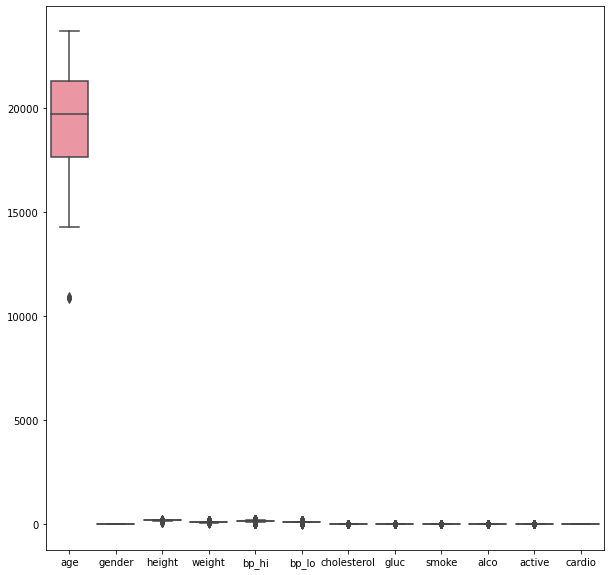

In [17]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=heart_data)

# 2.Data Integration

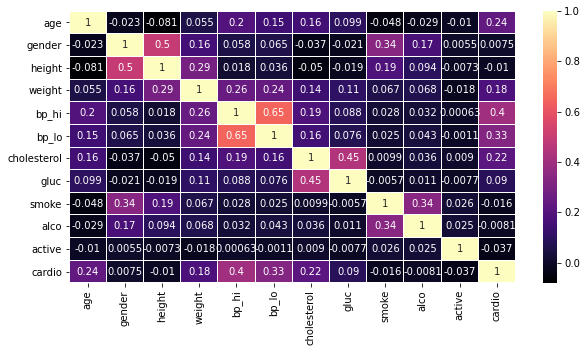

<Figure size 432x288 with 0 Axes>

In [18]:
#correlation 
plt.figure(figsize=(10,5))
sns.heatmap(heart_data.corr(),linewidth=.01,annot=True,cmap="magma")
plt.show()
plt.savefig('correlationfigure')

In [191]:
catogrial_val = ['gender', 'cholesterol','gluc', 'smoke', 'alco']

In [192]:
continous_val = ['age', 'height', 'weight', 'bp_hi', 'bp_lo']

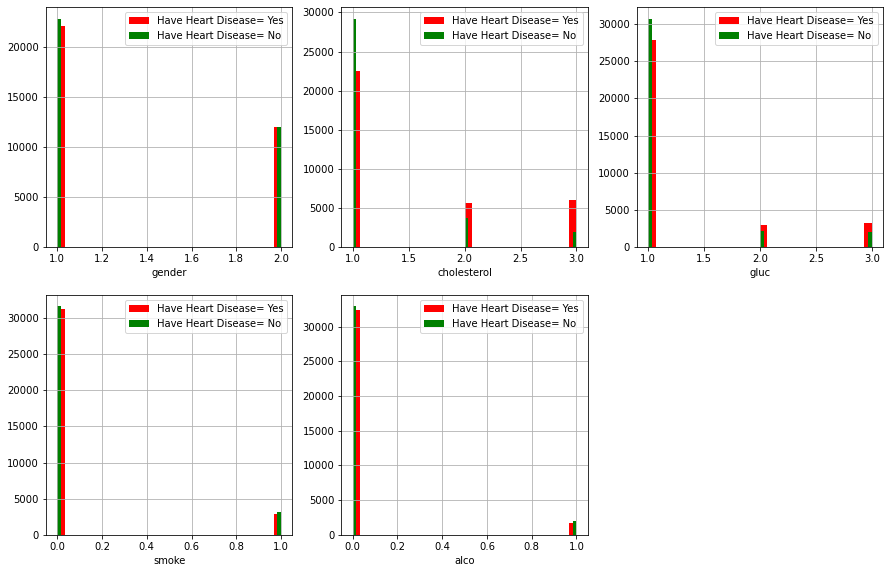

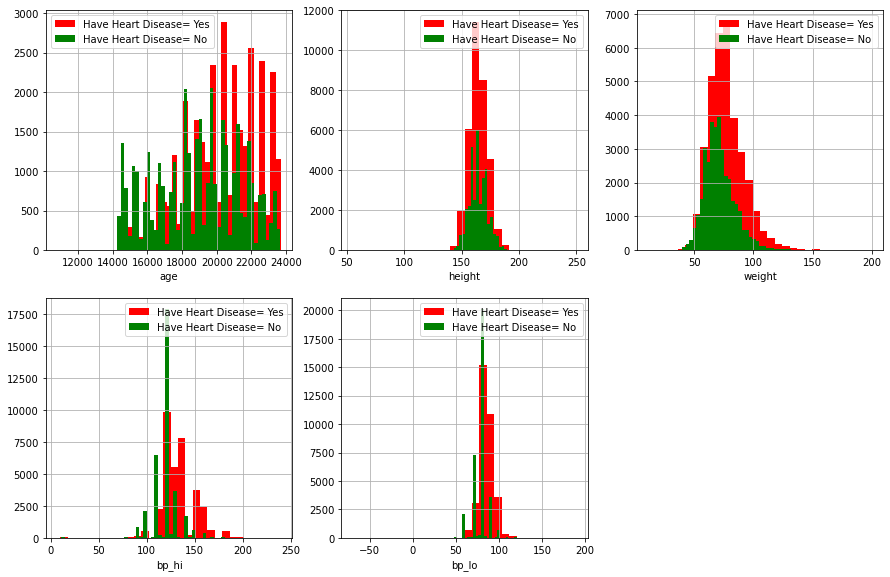

In [193]:
#ploatimg graph for all  the attributes

plt.figure(figsize=(15,15))
for i, column in enumerate(catogrial_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["cardio"]==1][column].hist(bins=30, color='red',label='Have Heart Disease= Yes')
    heart_data[heart_data["cardio"]==0][column].hist(bins=60, color='green',label='Have Heart Disease= No')
    plt.legend()
    plt.xlabel(column)
    
plt.savefig('graph1.png')
    
plt.figure(figsize=(15,15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["cardio"]==1][column].hist(bins=30, color='red',label='Have Heart Disease= Yes')
    heart_data[heart_data["cardio"]==0][column].hist(bins=60, color='green',label='Have Heart Disease= No')
    plt.legend()
    plt.xlabel(column)
    
plt.savefig('graph2.png')

In [194]:
# Get dummies for categorical values

heart_data = pd.get_dummies(data=heart_data,columns=['gender','cholesterol','gluc'])
heart_data.head()

,age,height,weight,bp_hi,bp_lo,smoke,alco,active,cardio,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,18393,168,62,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,20228,156,85,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,18857,165,64,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,17623,169,82,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,17474,156,56,100,60,0,0,0,0,1,0,1,0,0,1,0,0


In [195]:
heart_data=heart_data.rename({"gender_1":"male","gender_2":"female","cholesterol_1":"normal_cholesterol","cholesterol_2":"above_high_cholesterol","cholesterol_3":"high_cholesterol","gluc_1":"normal_glucose","gluc_2":"high_glucose","gluc_3":"above_high_glucose"},axis='columns') #diction
heart_data

,age,height,weight,bp_hi,bp_lo,smoke,alco,active,cardio,male,female,normal_cholesterol,above_high_cholesterol,high_cholesterol,normal_glucose,high_glucose,above_high_glucose
0,18393,168,62,110,80,0,0,1,0,0,1,1,0,0,1,0,0
1,20228,156,85,140,90,0,0,1,1,1,0,0,0,1,1,0,0
2,18857,165,64,130,70,0,0,0,1,1,0,0,0,1,1,0,0
3,17623,169,82,150,100,0,0,1,1,0,1,1,0,0,1,0,0
4,17474,156,56,100,60,0,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,168,76,120,80,1,0,1,0,0,1,1,0,0,1,0,0
69996,22601,158,126,140,90,0,0,1,1,1,0,0,1,0,0,1,0
69997,19066,183,105,180,90,0,1,0,1,0,1,0,0,1,1,0,0
69998,22431,163,72,135,80,0,0,0,1,1,0,1,0,0,0,1,0


# Training and Testing data


In [196]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [197]:
print(x.shape,x_train.shape,x_test.shape)

(69953, 16) (55962, 16) (13991, 16)


# (a) KNN CLASSIFIER 

In [199]:
# K Nearest neighbor Classifier

kn_scores = []
k_range = range(1, 31)

for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    kn_scores.append(knc.score(x_test,y_test))
print(dict(zip(k_range,kn_scores)))

{1: 0.6321921235079694, 2: 0.6318347509113001, 3: 0.6642841826888715, 4: 0.6715745836609249, 5: 0.6837967264670145, 6: 0.6844399971410192, 7: 0.691087127439068, 8: 0.6953755985990995, 9: 0.6971624615824459, 10: 0.6981631048531198, 11: 0.7001643913944678, 12: 0.7016653563004789, 13: 0.7043813880351655, 14: 0.706096776499178, 15: 0.7093846043885355, 16: 0.7095990279465371, 17: 0.7113858909298835, 18: 0.7108855692945465, 19: 0.7121721106425559, 20: 0.7115288399685512, 21: 0.7125294832392253, 22: 0.7120291616038882, 23: 0.71317275391323, 24: 0.7143163462225717, 25: 0.7148166678579086, 26: 0.7132442284325637, 27: 0.7159602601672503, 28: 0.7158173111285827, 29: 0.7160317346865842, 30: 0.714602244299907}


Text(0, 0.5, 'Accuracy %')

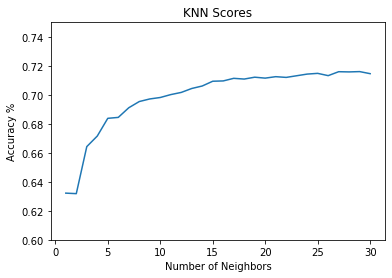

In [200]:
# Accuracy of different KNN Classifiers

plt.plot(k_range, kn_scores)
plt.ylim(0.6,0.75)
plt.title('KNN Scores')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy %')

# (b) NAIVE BAYES

In [201]:
#Naive Bayes 

gnb = GaussianNB()
#gnb.partial_fit(x_train, y_train,np.unique(y_train))
gnb.fit(x_train,y_train)
gnb_score = gnb.score(x_test, y_test)
print ("The accuracy score achieved using Naive Bayes is: "+str(gnb.score(x_test, y_test)))

The accuracy score achieved using Naive Bayes is: 0.6441283682367236


# Evaluation 

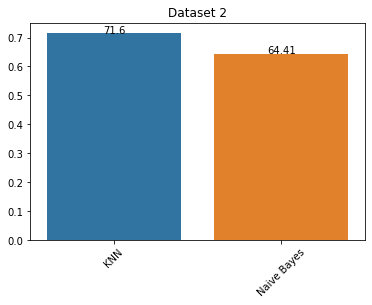

In [204]:
label = ['KNN','Naive Bayes']
scores = [kn_scores[26],gnb_score]
sns.barplot(x=label,y=scores)
plt.xticks(rotation=45)
for i in range(len(label)):
    plt.text(i,scores[i],round(scores[i]*100,2),horizontalalignment='center')
plt.title('Dataset 2')
plt.savefig('results.png')

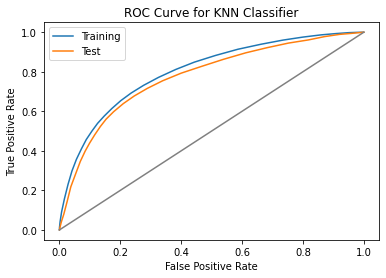

In [205]:
# ROC Curve for KNN Classifier
from sklearn.metrics import roc_curve

fpr,tpr,thres = roc_curve(y_train,knc.predict_proba(x_train)[::,1])
fpr2,tpr2,thres2 = roc_curve(y_test,knc.predict_proba(x_test)[::,1])
plt.plot(fpr,tpr,label='Training')
plt.plot(fpr2,tpr2,label='Test')
plt.plot([0,1],[0,1],c='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend()
plt.savefig('KNN ROC.png')

# Predecting the heart disease

In [207]:
input_data = (3,17623,2,169,82,150,100,1,1,0,0,1)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predection = model.predict(input_data_reshaped)
print(predection)

ValueError: query data dimension must match training data dimension